In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data_sleep = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
# data_sleep = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/SwissLabor.csv')
data_sleep.shape

(706, 34)

In [77]:
# sns.pairplot(data_sleep)
data_sleep

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


## 2 sleep equation #2
### 2.1 VIFs
Для набора данных `sleep75` рассмотрим линейную регрессию


**sleep на totwrk, age, age^2, smsa, male, south**.

Какие регрессии нужно рассматривать для вычисления показателей VIF для коэффициентов
**age, age^2, male**?

Ответ

- **age на totwrk, age, smsa, male, south**
- **age^2 на totwrk, age, smsa, male, south**
- **male на totwrk, age, age^2 smsa, south**


In [78]:
# Модель sleep на totwrk, age, age**2, smsa, male, south
Sleep_eq21 = smf.ols(formula = 'sleep~totwrk+age+agesq+smsa+male+south', data = data_sleep).fit()

In [79]:
# Модель 1:  age на totwrk, agesq, smsa, male, south
# Создаем спецификацию модели через формулу и подгоняем модель
model_21 = smf.ols(formula = 'age~totwrk+agesq+smsa+male+south', data = data_sleep).fit()

In [80]:
# Модель 2: agesq на totwrk, age, smsa, male, south
# Создаем спецификацию модели через формулу и подгоняем модель
model_22 = smf.ols(formula = 'agesq~totwrk+age+smsa+male+south', data = data_sleep).fit()

In [81]:
# Модель 3: male на totwrk, age, agesq, smsa, south
# Создаем спецификацию модели через формулу и подгоняем модель
model_23 = smf.ols(formula = 'male~totwrk+age+agesq+smsa+south', data = data_sleep).fit()

In [82]:
#Результаты подгонки
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'R-squared': lambda x: "%#8.3f" % x.rsquared,
             'Adj. R-squared': lambda x: "%#8.3f" % x.rsquared_adj,
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }

print(summary_col([model_21, model_22, model_23], stars=True, float_format='%.3f', info_dict = info_dict))


                       age       agesq       male  
---------------------------------------------------
Intercept           19.015*** -1552.146*** 0.129   
                    (0.173)   (19.639)     (0.241) 
R-squared           0.985     0.985        0.147   
R-squared Adj.      0.985     0.985        0.141   
age                           83.036***    -0.001  
                              (0.392)      (0.012) 
agesq               0.012***               0.000   
                    (0.000)                (0.000) 
male                -0.011    2.636                
                    (0.116)   (9.682)              
smsa                0.014     -0.555       0.008   
                    (0.111)   (9.320)      (0.036) 
south               -0.208    17.250       -0.066  
                    (0.141)   (11.798)     (0.046) 
totwrk              0.000***  -0.019***    0.000***
                    (0.000)   (0.005)      (0.000) 
No. Observations    706       706          706     
R-squared  

In [83]:
# VIF для age c округлением до 2-х десятичных знаков
VIF_1 = 1/(1 - model_21.rsquared)
VIF_1.round(2)

65.47

In [84]:
# VIF для totwrk^2/10000 c округлением до 2-х десятичных знаков
VIF_2 = 1/(1 - model_22.rsquared)
VIF_2.round(2)

65.6

In [85]:
# VIF для male c округлением до 2-х десятичных знаков
VIF_3 = 1/(1 - model_23.rsquared)
VIF_3.round(2)

1.17

In [86]:
# names of exog
Sleep_eq21.model.exog_names

['Intercept', 'totwrk', 'age', 'agesq', 'smsa', 'male', 'south']

In [87]:
# VIF для totwrk/100 c округлением до 2-х десятичных знаков
VIF_1 = variance_inflation_factor(exog = Sleep_eq21.model.exog, exog_idx = 2)
print('VIF for exog', Sleep_eq21.model.exog_names[2], ': ', VIF_1.round(2))

VIF for exog age :  65.47


In [88]:
# VIF для totwrk^2/10000 c округлением до 2-х десятичных знаков
VIF_2 = variance_inflation_factor(exog = Sleep_eq21.model.exog, exog_idx = 3)
print('VIF for exog', Sleep_eq21.model.exog_names[3], ': ', VIF_2.round(2))

VIF for exog agesq :  65.6


In [89]:
# VIF для male c округлением до 2-х десятичных знаков
VIF_3 = variance_inflation_factor(exog = Sleep_eq21.model.exog, exog_idx = 5)
print('VIF for exog', Sleep_eq21.model.exog_names[5], ': ', VIF_3.round(2))

VIF for exog male :  1.17


### 2.2 Последствия

Для набора данных `sleep75` рассмотрим линейную регрессию
**sleep на totwrk, age, age^2, smsa, male, union**.

Результаты оценивания:


In [90]:
# Модель sleep на totwrk/100, totwrk^2/10000, age, smsa, male
Sleep_eq22 = smf.ols(formula = 'sleep~totwrk+age+agesq+smsa+male+union', data = data_sleep).fit()


In [91]:
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }
# print(Sleep_eq22)
print(summary_col(Sleep_eq22, float_format='%.3f', stars=True, info_dict = info_dict))


                       sleep   
-------------------------------
Intercept           3688.551***
                    (218.389)  
totwrk              -0.165***  
                    (0.018)    
age                 -7.734     
                    (11.213)   
agesq               0.127      
                    (0.134)    
smsa                -74.527**  
                    (32.156)   
male                86.321**   
                    (34.329)   
union               8.574      
                    (38.195)   
R-squared           0.125      
R-squared Adj.      0.117      
No. Observations    706        
Residual Std. Error 417.584    
F-statistic         16.583     
Prob (F-statistic)  0.000      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [92]:
# Уровень значимости 10%
alpha = 0.1
df = summary_params(Sleep_eq22, alpha=alpha)
df['significance'] = df.apply(lambda x: 'Значим' if x['P>|t|']<alpha else 'Незначим', axis=1)
df

,Coef.,Std.Err.,t,P>|t|,[0.05,0.95],significance
Intercept,3688.551350,218.389349,16.889795,6.295923e-54,3328.856130,4048.246570,Значим
totwrk,-0.165252,0.018149,-9.105295,8.890671e-19,-0.195144,-0.135360,Значим
age,-7.733689,11.212815,-0.689719,4.906000e-01,-26.201603,10.734226,Незначим
agesq,0.127085,0.134030,0.948180,3.433654e-01,-0.093668,0.347838,Незначим
smsa,-74.526893,32.156290,-2.317646,2.075647e-02,-127.489476,-21.564311,Значим
male,86.321465,34.328712,2.514556,1.214165e-02,29.780824,142.862105,Значим
union,8.574424,38.194679,0.224493,8.224396e-01,-54.333604,71.482453,Незначим


### На уровне значимости 10% значимы коэффициенты: \"totwrk\" \"smsa\" \"male\"


## Тестируется значимость влияния занятости, т.е. гипотеза

### $H_0:\beta_{age}=\beta_{age^2}=0$.

In [93]:
# тестовая F_stat
f_stat = Sleep_eq22.f_test('age = agesq = 0').fvalue
print(f'F_stat = {f_stat:3.3f}')

F_stat = 2.497


In [94]:
# критическое значение F_crit
# alpha=0.1
f_crit = scipy.stats.f.ppf(1-alpha, 2, 700).round(2)
print(f'F_crit = {f_crit:3.3f}')

F_crit = 2.310


### Так как F_stat > F_crit, то гипотеза отвергается. Значит коэффициенты совместно значимы

In [95]:
#VIFs
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(Sleep_eq22.model.exog, i) for i in range(int(Sleep_eq12.df_model+1))]}, index=Sleep_eq12.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
totwrk,1.195469
age,65.397082
agesq,65.561373
smsa,1.004278
male,1.171666
union,1.007332


In [96]:
# Матрица корреляций
df_sleep = data_sleep[['totwrk', 'age', 'agesq', 'smsa', 'male', 'union']].copy()
corr_matrix = df_sleep.corr().round(3)
corr_matrix

,totwrk,age,agesq,smsa,male,union
totwrk,1.000,-0.050,-0.067,-0.038,0.376,0.002
age,-0.050,1.000,0.992,0.025,0.032,-0.037
agesq,-0.067,0.992,1.000,0.024,0.026,-0.042
smsa,-0.038,0.025,0.024,1.000,0.007,-0.039
male,0.376,0.032,0.026,0.007,1.000,0.040
union,0.002,-0.037,-0.042,-0.039,0.040,1.000


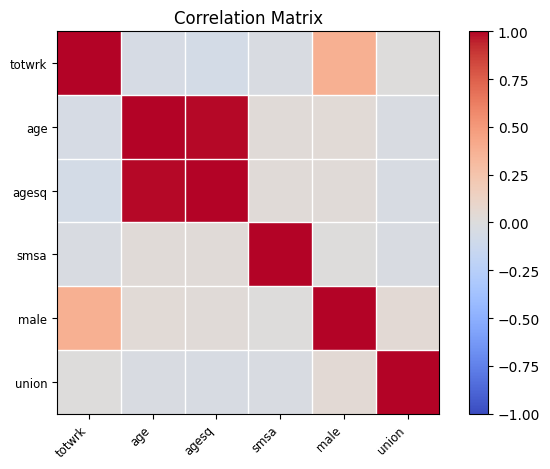

In [97]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=df_sleep.columns, normcolor=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

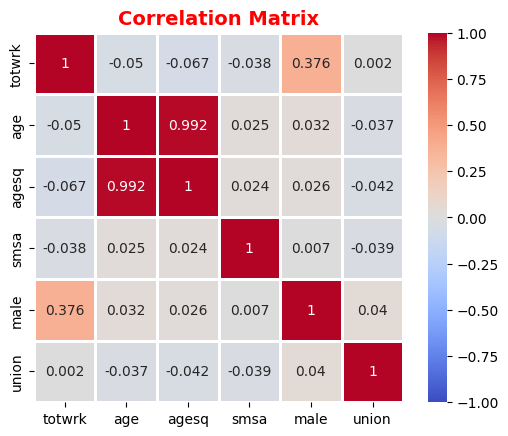

In [98]:
# Визуализация корреляций
sns.heatmap(corr_matrix, annot=True, fmt='.3g', vmin=-1, vmax=1, center=0, cmap='coolwarm', 
            square=True, linewidths=1, linecolor='white')
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

### "Продвинутая" визуализация корреляций

Text(0.5, 1.0, 'Correlation Matrix')

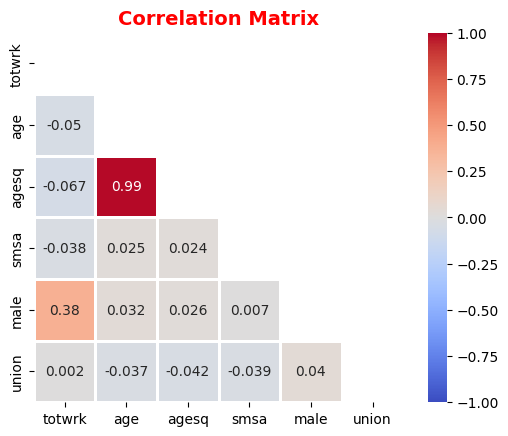

In [99]:
corr_matrix = df_sleep.corr().round(3)
# нижнетреугольная матрица корреляций
mask = np.triu(corr_matrix)
sns.heatmap(
    corr_matrix, annot=True, fmt='.2g',
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm', square=True,
    linewidths=1, linecolor='white',
    mask=mask
)
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix')

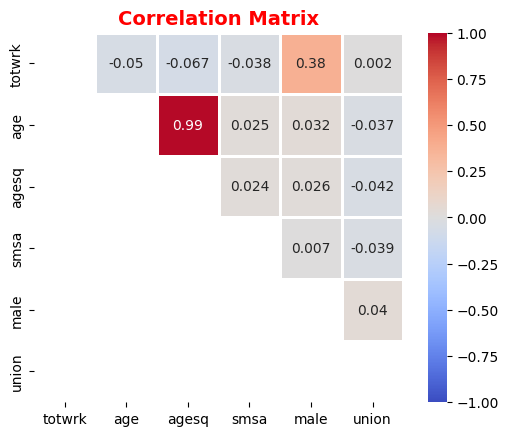

In [100]:
corr_matrix = df_sleep.corr().round(3)
# верхнетреугольная матрица корреляций
mask = np.tril(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, linewidths=1, linecolor='white', mask=mask)
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

In [101]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .set_properties(**{'text-align': 'center'})
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2, na_rep=" ")
 .set_caption('Correlation Matrix'))

,totwrk,age,agesq,smsa,male,union
totwrk,,,,,,
age,-0.05,,,,,
agesq,-0.07,0.99,,,,
smsa,-0.04,0.03,0.02,,,
male,0.38,0.03,0.03,0.01,,
union,0.00,-0.04,-0.04,-0.04,0.04,
